### Author: KR
### Date: 03/28/2025

# Topic: Analyzing Global Energy Consumption Trends Across Countries

### Business Problem:

The increasing global demand for energy requires a clear understanding of consumption trends and growth rates. This project will explore how different countries have consumed energy over the years, which regions have shown the most growth, and whether any correlations exist between energy consumption and economic or environmental policies.

### Import Libraries and Load the Dataset

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset
df = pd.read_csv("Country_Consumption_TWH.csv")

In [10]:
# Display the first few rows
df.head()

,Year,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
0,1990.0,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1,1991.0,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
2,1992.0,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
3,1993.0,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
4,1994.0,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0


### Data Preparation

In [13]:
# Check for missing values
missing_values = df.isnull().sum()

# Show columns with any missing values
missing_values[missing_values > 0]

Year                    2
China                   2
United States           2
Brazil                  2
Belgium                 2
Czechia                 2
France                  2
Germany                 2
Italy                   2
Netherlands             2
Poland                  2
Portugal                2
Romania                 2
Spain                   2
Sweden                  2
United Kingdom          2
Norway                  2
Turkey                  2
Kazakhstan              2
Russia                  2
Ukraine                 2
Uzbekistan              2
Argentina               2
Canada                  2
Chile                   2
Colombia                2
Mexico                  2
Venezuela               2
Indonesia               2
Japan                   2
Malaysia                2
South Korea             2
Taiwan                  2
Thailand                2
India                   2
Australia               2
New Zealand             2
Algeria                 2
Egypt       

In [15]:
# Drop rows with any missing values
df_clean = df.dropna().copy()

# Confirm that there are no missing values left
df_clean.isnull().sum().sum()

0

In [17]:
# Check data types
df.dtypes

Year                    float64
China                   float64
United States           float64
Brazil                  float64
Belgium                 float64
Czechia                 float64
France                  float64
Germany                 float64
Italy                   float64
Netherlands             float64
Poland                  float64
Portugal                float64
Romania                 float64
Spain                   float64
Sweden                  float64
United Kingdom          float64
Norway                  float64
Turkey                  float64
Kazakhstan              float64
Russia                  float64
Ukraine                 float64
Uzbekistan              float64
Argentina               float64
Canada                  float64
Chile                   float64
Colombia                float64
Mexico                  float64
Venezuela               float64
Indonesia               float64
Japan                   float64
Malaysia                float64
South Ko

In [19]:
# Check year range
print(f"Year range: {int(df['Year'].min())} - {int(df['Year'].max())}")

Year range: 1990 - 2020


In [21]:
# Convert Year to integer
df_clean['Year'] = df_clean['Year'].astype(int)

# Set Year as index
df_clean.set_index('Year', inplace=True)

In [23]:
# Display cleaned DataFrame shape and preview
print(f"Data shape: {df_clean.shape}")
df_clean.head()

Data shape: (31, 44)


,China,United States,Brazil,Belgium,Czechia,France,Germany,Italy,Netherlands,Poland,...,Australia,New Zealand,Algeria,Egypt,Nigeria,South Africa,Iran,Kuwait,Saudi Arabia,United Arab Emirates
Year,,,,,,,,,,,,,,,,,,,,,
1990,874.0,1910.0,141.0,48.0,50.0,225.0,351.0,147.0,67.0,103.0,...,86.0,14.0,22.0,33.0,66.0,90.0,69.0,9.0,58.0,20.0
1991,848.0,1925.0,143.0,50.0,45.0,237.0,344.0,150.0,69.0,101.0,...,85.0,14.0,23.0,33.0,70.0,92.0,77.0,3.0,68.0,23.0
1992,877.0,1964.0,145.0,51.0,44.0,234.0,338.0,149.0,69.0,99.0,...,87.0,14.0,24.0,34.0,72.0,88.0,81.0,9.0,77.0,22.0
1993,929.0,1998.0,148.0,49.0,43.0,238.0,335.0,149.0,70.0,101.0,...,91.0,15.0,24.0,35.0,74.0,94.0,87.0,12.0,80.0,23.0
1994,973.0,2036.0,156.0,52.0,41.0,231.0,333.0,147.0,70.0,96.0,...,91.0,15.0,23.0,34.0,72.0,98.0,97.0,14.0,84.0,26.0


### Exploratory Data Analysis (EDA)

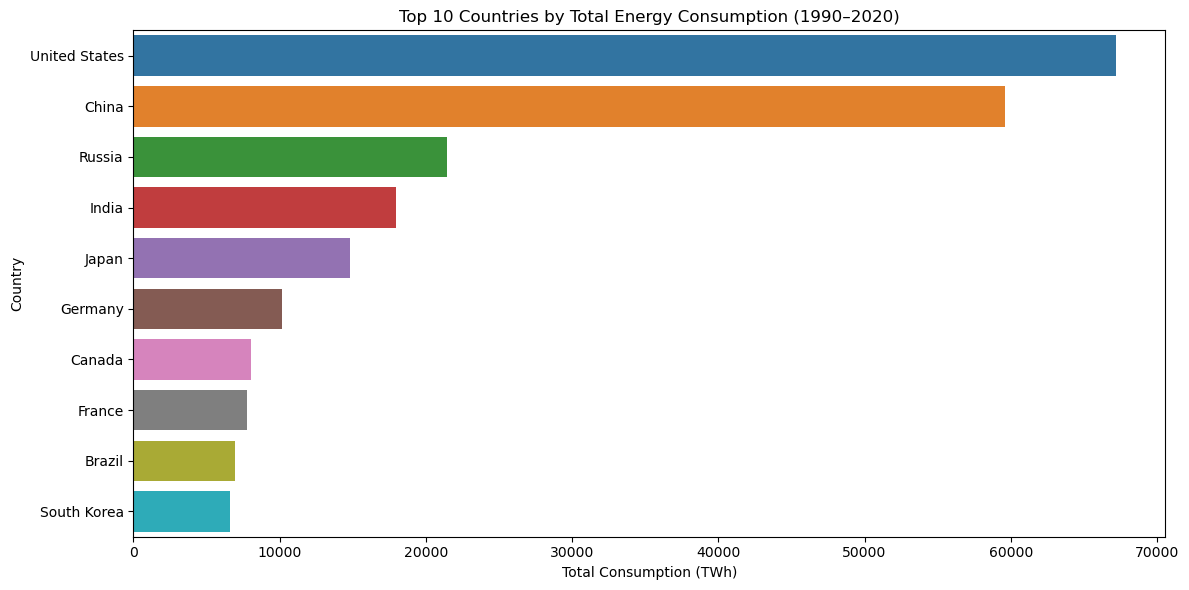

In [26]:
# Total energy consumption per country across all years
total_by_country = df_clean.sum().sort_values(ascending=False)

# Plot top 10 countries
plt.figure(figsize=(12,6))
sns.barplot(x=total_by_country.head(10).values, y=total_by_country.head(10).index)
plt.title("Top 10 Countries by Total Energy Consumption (1990–2020)")
plt.xlabel("Total Consumption (TWh)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

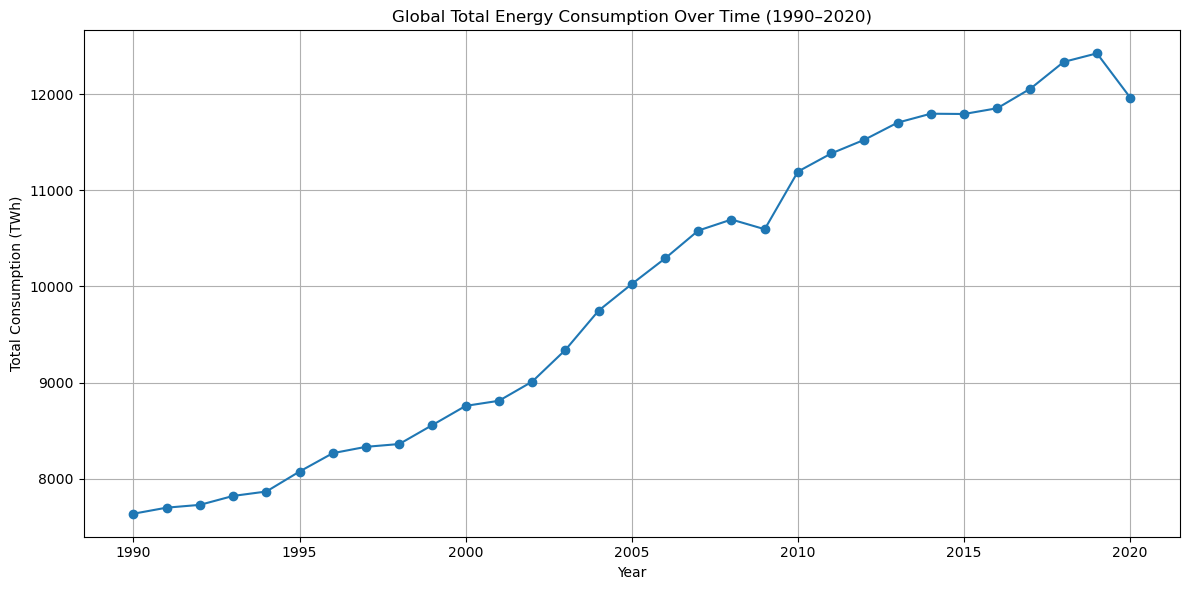

In [28]:
# Total consumption across all countries per year
global_trend = df_clean.sum(axis=1)

plt.figure(figsize=(12,6))
plt.plot(global_trend.index, global_trend.values, marker='o')
plt.title("Global Total Energy Consumption Over Time (1990–2020)")
plt.xlabel("Year")
plt.ylabel("Total Consumption (TWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

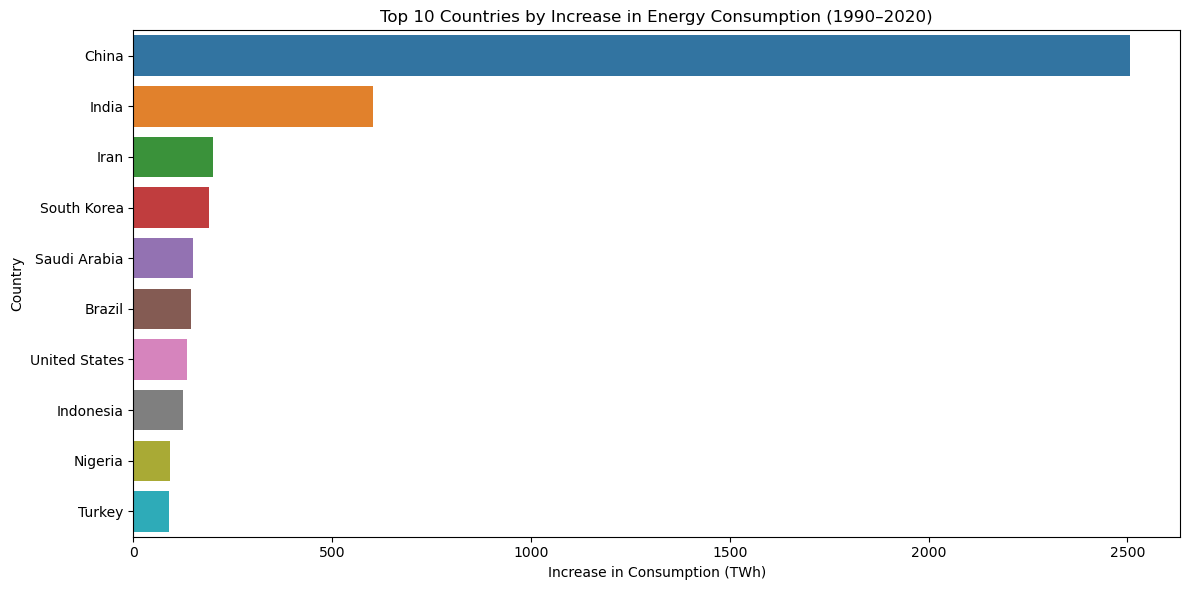

In [30]:
# Calculate growth: last year - first year
growth = df_clean.iloc[-1] - df_clean.iloc[0]
growth_sorted = growth.sort_values(ascending=False)

# Plot top 10 countries by growth
plt.figure(figsize=(12,6))
sns.barplot(x=growth_sorted.head(10).values, y=growth_sorted.head(10).index)
plt.title("Top 10 Countries by Increase in Energy Consumption (1990–2020)")
plt.xlabel("Increase in Consumption (TWh)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

Highlights:

📊 Top 10 Countries by Total Energy Consumption (1990–2020): 
- United States and China dominate total energy consumption.
- Russia, India, and Japan follow, showing their industrial and population-driven demand.
- The list includes both developed and developing countries, showing the global spread of energy demand.
   
📈 Global Energy Consumption Over Time: 
- There's a steady upward trend from 1990 until about 2019.
- A noticeable dip in 2020, likely due to the COVID-19 pandemic and global economic slowdown.
- Overall, energy consumption nearly doubled from 1990 to 2020.

📈 Top 10 Countries by Increase in Energy Consumption (1990–2020): 
- China leads by far, with a massive increase—likely tied to rapid industrialization, urbanization, and economic growth.
- India follows, showing its rise as a growing economy with increasing energy needs.
- Iran, South Korea, and Saudi Arabia are notable climbers, possibly reflecting infrastructure growth and population increase.
- Interestingly, the United States appears lower despite being the top consumer overall—suggesting slower or more stabilized growth over time.

### Case Study: Energy Trends for US, China, and India

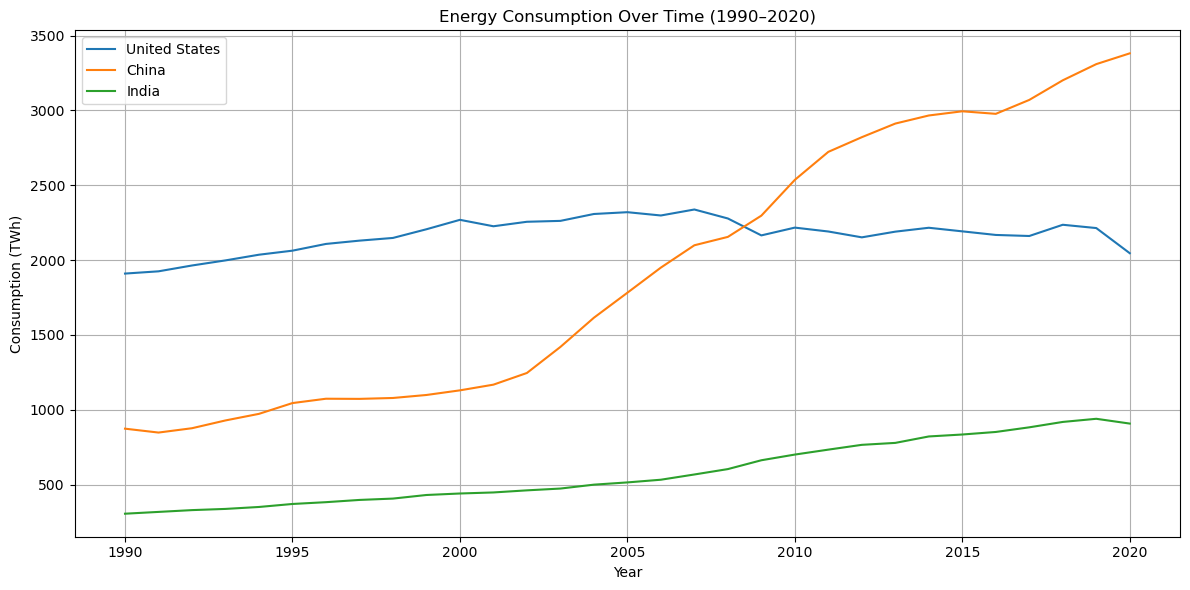

In [33]:
# Plot energy consumption over time for US, China, and India
plt.figure(figsize=(12,6))
plt.plot(df_clean.index, df_clean['United States'], label='United States')
plt.plot(df_clean.index, df_clean['China'], label='China')
plt.plot(df_clean.index, df_clean['India'], label='India')
plt.title("Energy Consumption Over Time (1990–2020)")
plt.xlabel("Year")
plt.ylabel("Consumption (TWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Highlights:

- China’s explosive growth.
- India’s steady climb.
- US’s flat or slightly declining trend in recent years.

### Modeling: ARIMA - Forecasting US, China, and India Energy Consumption

In [36]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [38]:
# Extract and model the US data
us_series = df_clean['United States']

# Fit an ARIMA model
model = ARIMA(us_series, order=(2,1,2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          United States   No. Observations:                   31
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -158.260
Date:                Sun, 23 Mar 2025   AIC                            326.521
Time:                        12:42:20   BIC                            333.526
Sample:                             0   HQIC                           328.762
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1126      0.421     -2.643      0.008      -1.938      -0.288
ar.L2         -0.6416      0.303     -2.115      0.034      -1.236      -0.047
ma.L1          1.4161      0.572      2.477      0.0

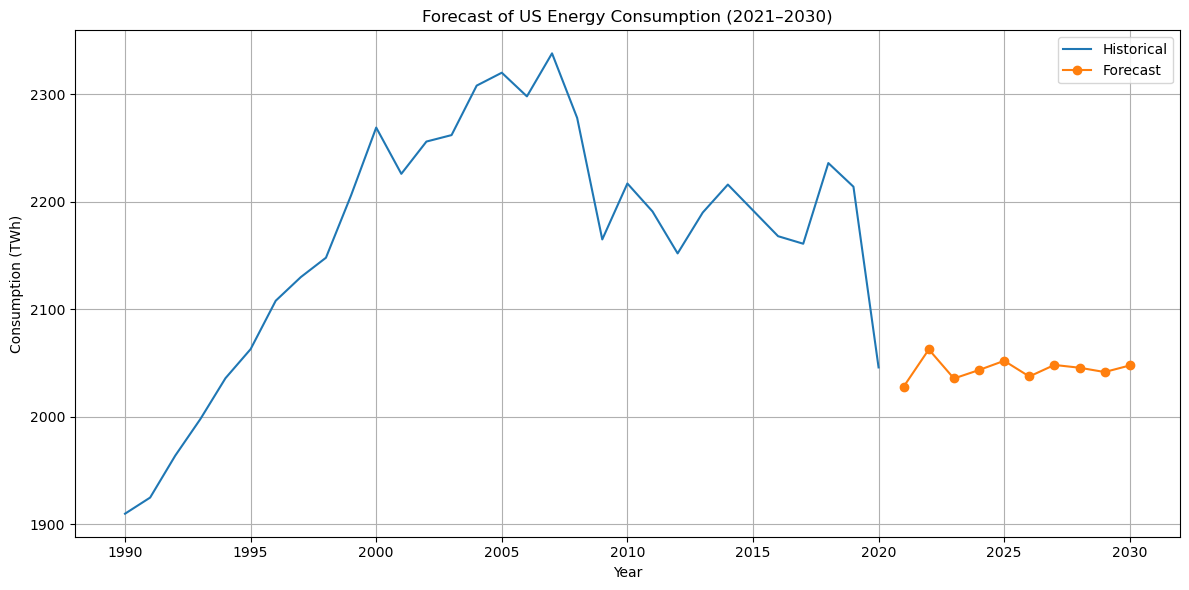

In [40]:
# Forecast next 10 years
forecast = model_fit.forecast(steps=10)
future_years = range(df_clean.index[-1] + 1, df_clean.index[-1] + 11)

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(us_series.index, us_series, label='Historical')
plt.plot(future_years, forecast, label='Forecast', marker='o')
plt.title("Forecast of US Energy Consumption (2021–2030)")
plt.xlabel("Year")
plt.ylabel("Consumption (TWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# Extract and model China data
us_series = df_clean['China']

# Fit an ARIMA model
model = ARIMA(us_series, order=(2,1,2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  China   No. Observations:                   31
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -157.612
Date:                Sun, 23 Mar 2025   AIC                            325.223
Time:                        12:42:34   BIC                            332.229
Sample:                             0   HQIC                           327.465
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3370      0.680      1.966      0.049       0.004       2.670
ar.L2         -0.3661      0.596     -0.614      0.539      -1.534       0.802
ma.L1         -0.2396      0.629     -0.381      0.7

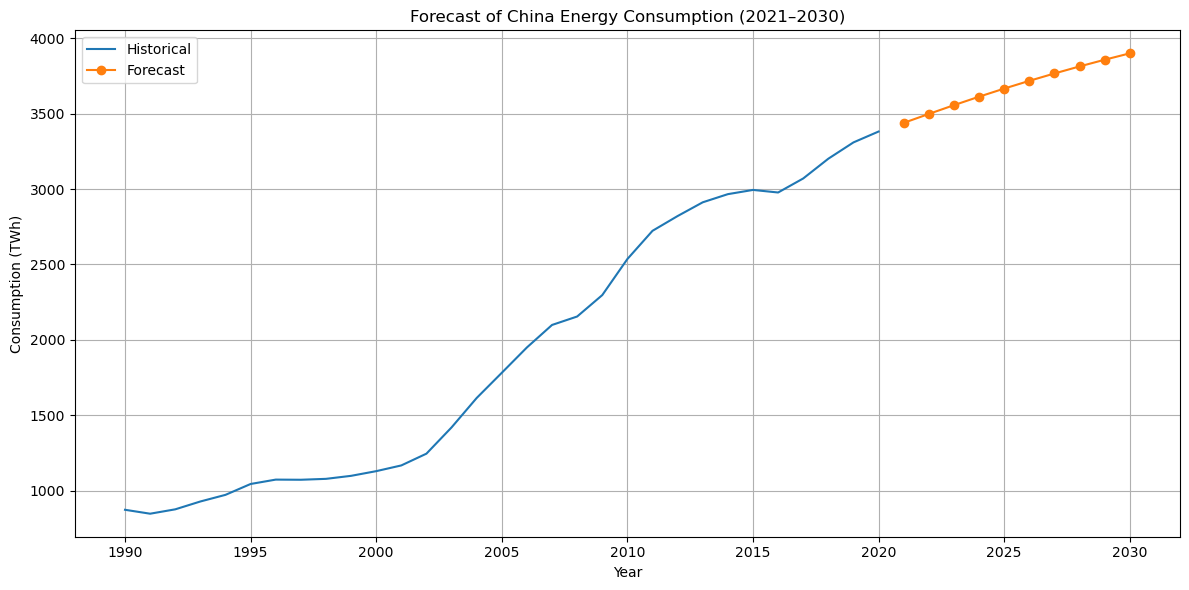

In [46]:
# Forecast next 10 years
forecast = model_fit.forecast(steps=10)
future_years = range(df_clean.index[-1] + 1, df_clean.index[-1] + 11)

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(us_series.index, us_series, label='Historical')
plt.plot(future_years, forecast, label='Forecast', marker='o')
plt.title("Forecast of China Energy Consumption (2021–2030)")
plt.xlabel("Year")
plt.ylabel("Consumption (TWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [48]:
# Extract and model India data
us_series = df_clean['India']

# Fit an ARIMA model
model = ARIMA(us_series, order=(2,1,2))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  India   No. Observations:                   31
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -124.724
Date:                Sun, 23 Mar 2025   AIC                            259.447
Time:                        12:43:30   BIC                            266.453
Sample:                             0   HQIC                           261.689
                                 - 31                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2474      0.491      0.504      0.614      -0.715       1.210
ar.L2          0.1786      0.539      0.331      0.740      -0.878       1.235
ma.L1          0.6401      0.321      1.992      0.0

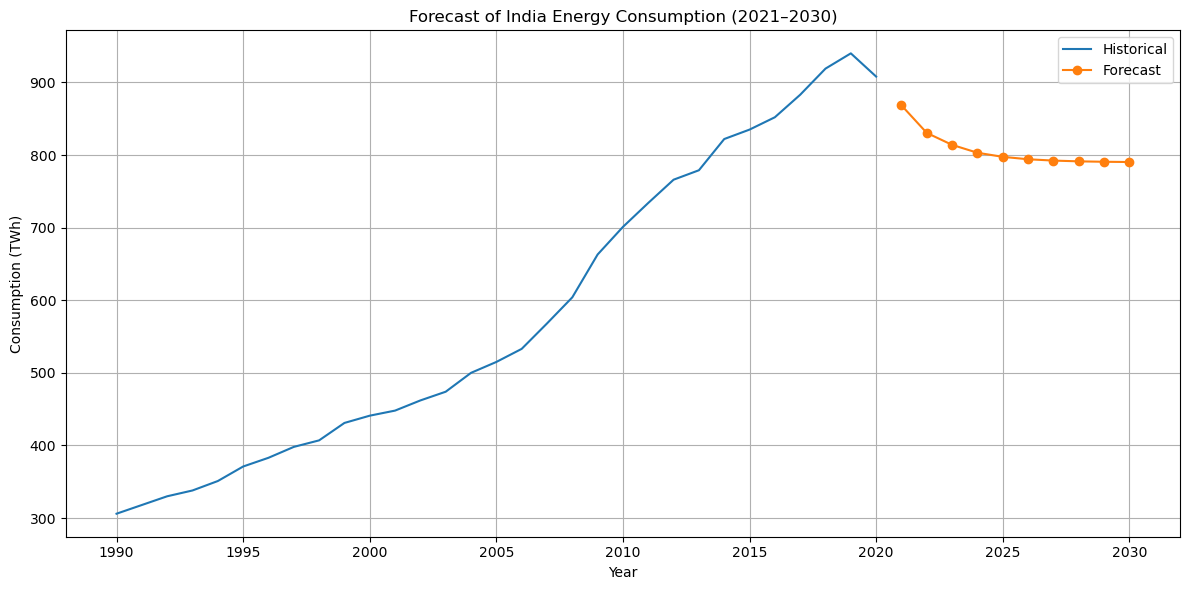

In [50]:
# Forecast next 10 years
forecast = model_fit.forecast(steps=10)
future_years = range(df_clean.index[-1] + 1, df_clean.index[-1] + 11)

# Plot the forecast
plt.figure(figsize=(12,6))
plt.plot(us_series.index, us_series, label='Historical')
plt.plot(future_years, forecast, label='Forecast', marker='o')
plt.title("Forecast of India Energy Consumption (2021–2030)")
plt.xlabel("Year")
plt.ylabel("Consumption (TWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📊 Forecast Interpretation Summary

🇺🇸 United States
Forecast trend: Slight decline, stabilizing around 2050–2080 TWh.
Insight: US consumption has likely plateaued due to efficiency improvements, policy, or economic factors.

🇨🇳 China
Forecast trend: Continued strong upward growth reaching nearly 3900 TWh by 2030.
Insight: China’s industrial and economic expansion is expected to push demand further, reinforcing its lead.

🇮🇳 India
Forecast trend: Slight dip then plateau, leveling around 790–800 TWh.
Insight: May suggest a short-term correction or stabilization phase after years of rapid growth. Could reflect real-world events like reforms or policy shifts (worth mentioning in the discussion section).